# DATASET DOWNLOAD AND IMPORTING MODULES

Using kagglehub api, here you can check the [dataset link](https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption)

In [1]:
# kaggle and dataset download
import kagglehub
import shutil
import os

# basics and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

print("Path to dataset files:", path)

100%|██████████| 456k/456k [00:00<00:00, 30.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/adilshamim8/student-depression-dataset/versions/1


In [3]:
# IMPORTING TO RELATIVE PATH
local_path = "./dataset"

os.makedirs(local_path, exist_ok=True)

shutil.copytree(path, local_path, dirs_exist_ok=True)

print("Dataset movido a:", local_path)


Dataset movido a: ./dataset


In [4]:
df = pd.read_csv(f'{local_path}/student_depression_dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


# Exploratory data analysis

Checking column info and not-null values

In [5]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [6]:
df.shape # checking shape

(27901, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [8]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


## Value counts

In [9]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## Numeric values

In [10]:
df_numeric = df.copy().select_dtypes('number').drop('id', axis=1)

In [11]:
df_numeric.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


As we can see, there isn't any null values

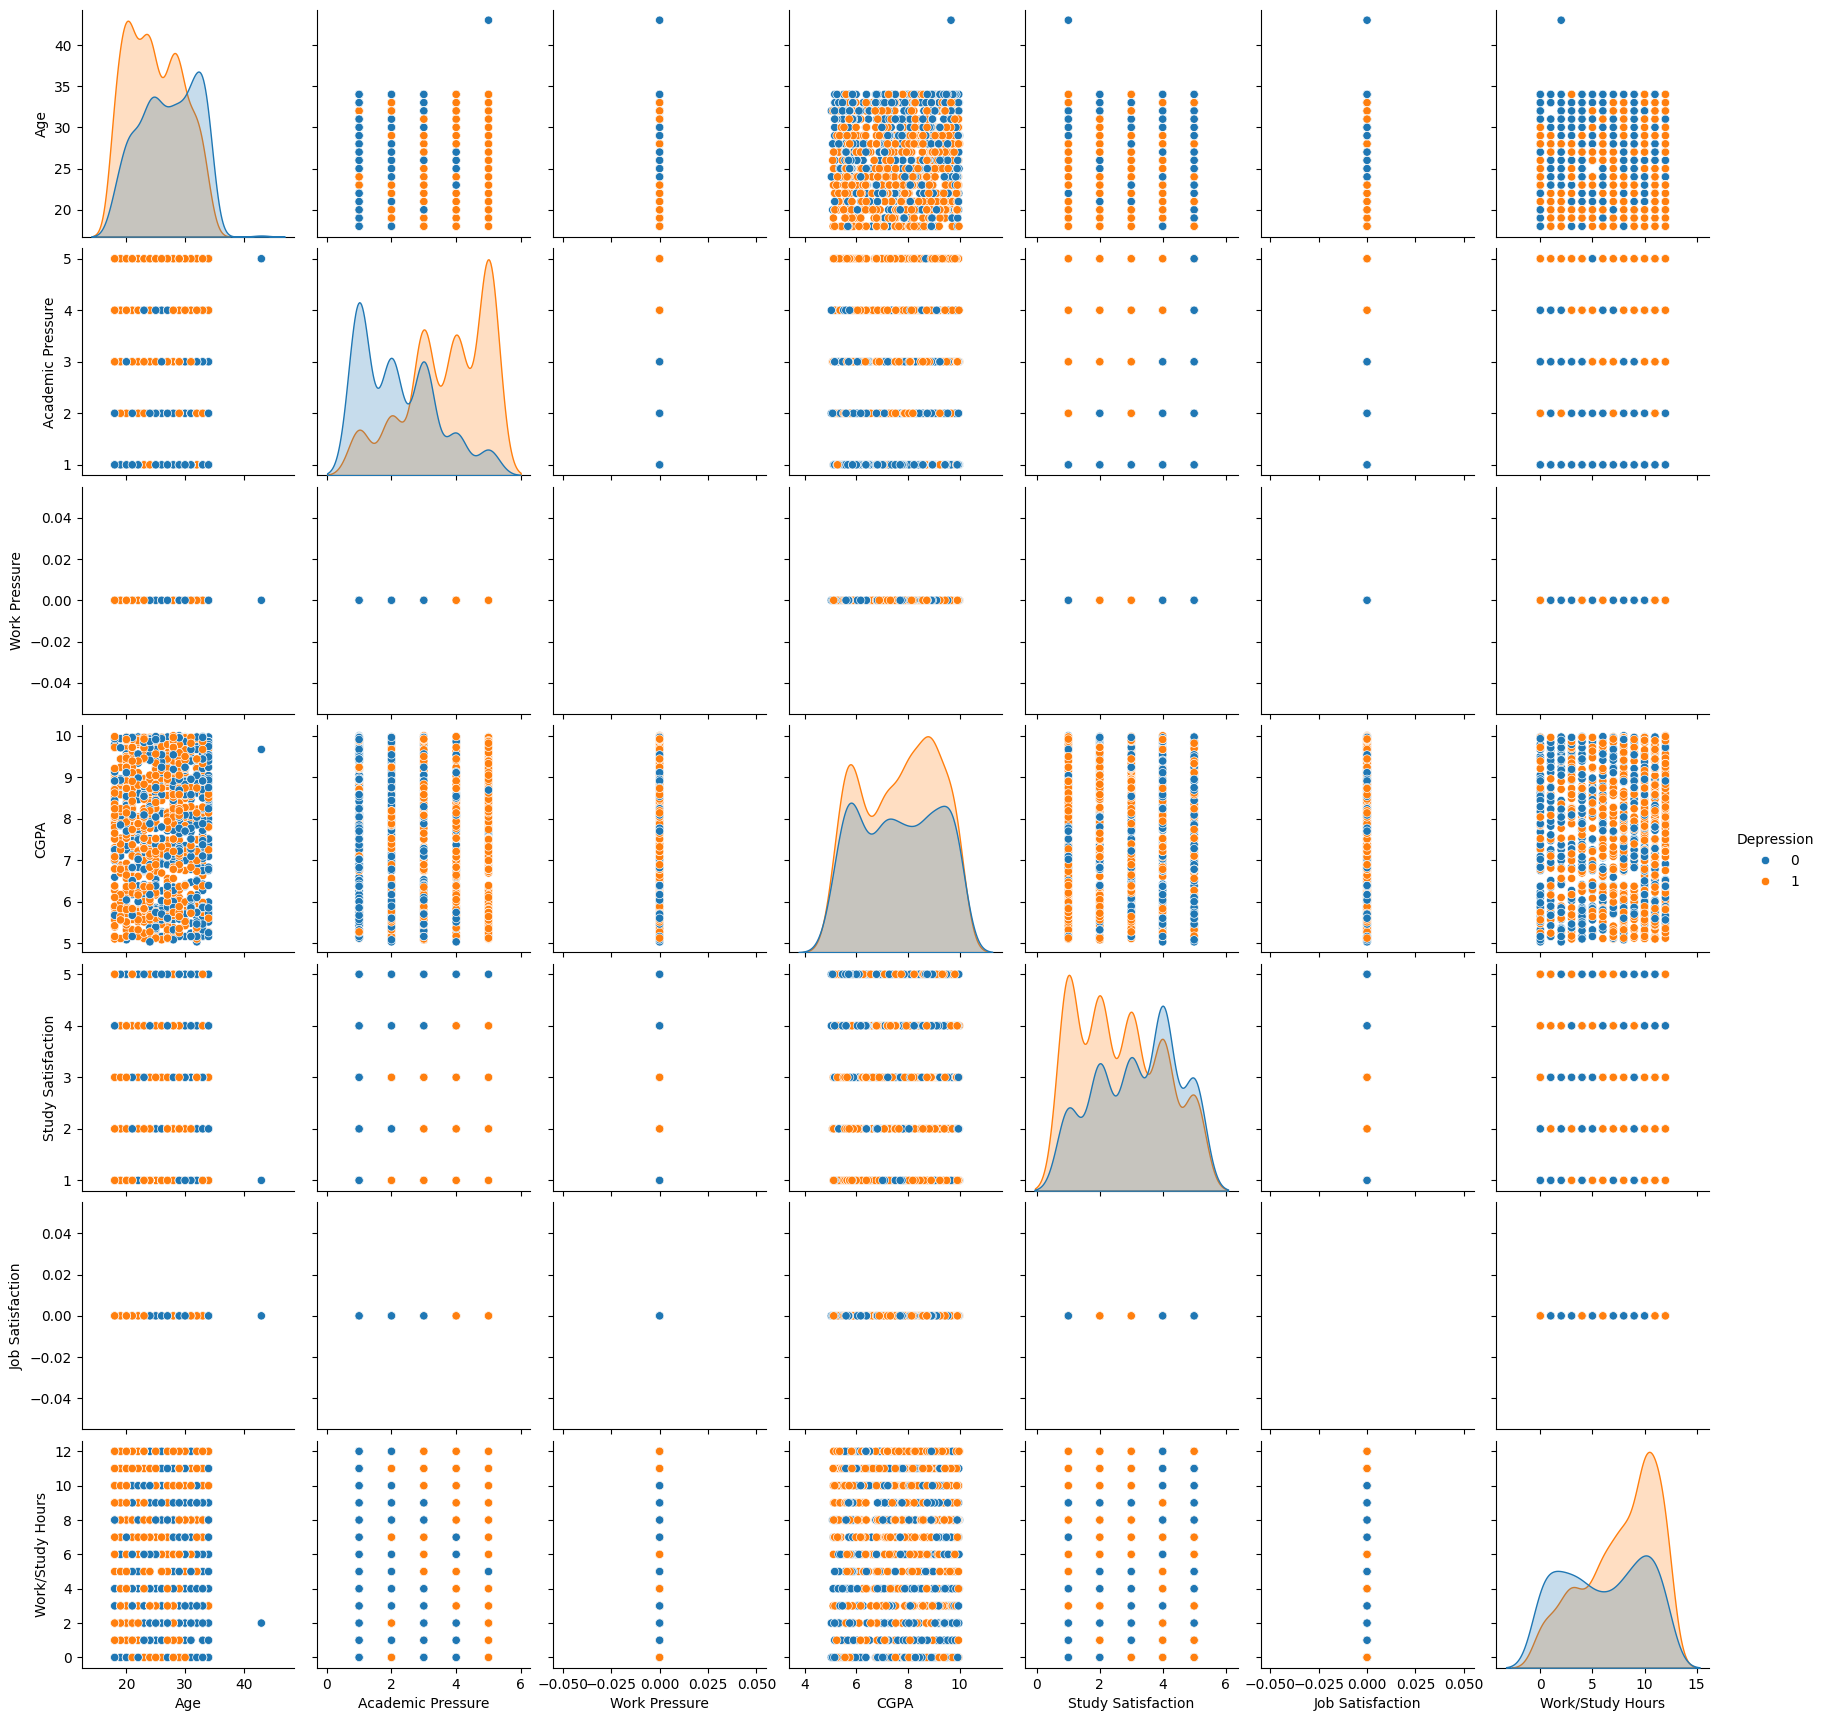

In [12]:
sns.pairplot(df_numeric.sample(frac = 0.05), hue='Depression')

<Axes: >

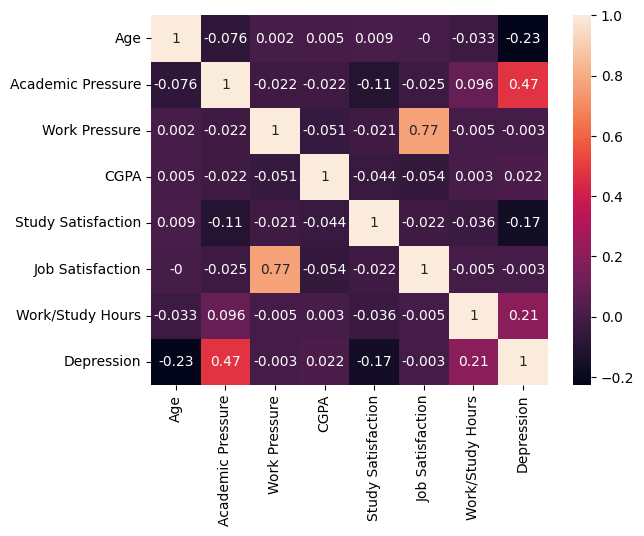

In [13]:
df_corr = df_numeric.corr()
sns.heatmap(df_corr.round(3), annot=True)

<Axes: >

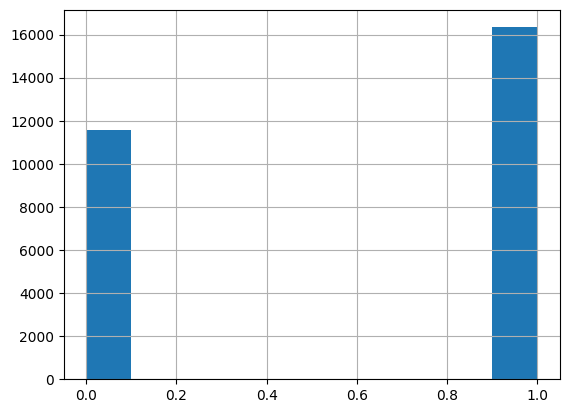

In [14]:
df['Depression'].hist()

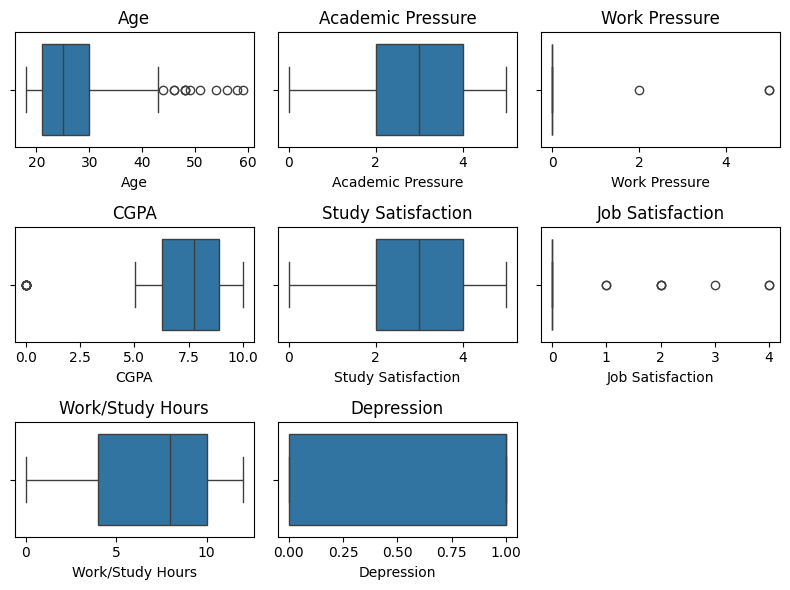

In [15]:
# Create subplots for each numeric column
num_cols = len(df_numeric.columns)
rows = (num_cols + 2) // 3  # Distribute columns across rows
fig, axes = plt.subplots(rows, 3, figsize=(8, 2 * rows))

# Iterate through numeric columns
for i, col in enumerate(df_numeric.columns):
  row = i // 3
  col_idx = i % 3

  # Create boxplot for the current column
  sns.boxplot(x=df_numeric[col], ax=axes[row, col_idx])
  axes[row, col_idx].set_title(col)

# Remove empty subplots if any
for i in range(num_cols, rows * 3):
    row = i // 3
    col_idx = i % 3
    fig.delaxes(axes[row, col_idx])

plt.tight_layout()
plt.show()


# FEATURE ENGINEERING

In [16]:
df_preprocessed = df.copy()

In [17]:
df_preprocessed.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


## Removing unuseful features

Remove no meaningful features:

- **id:** just a simple identifier.
- **City:** We wanted to map city with respective quality life but no reliable data was found for most of the cities.
- **Degree:** +10 values that will not help to generalize the model.

In [18]:
df_preprocessed.drop(['id', 'City','Degree'], inplace=True, axis=1)

## Data handling per feature

### **Binary features:** Gender, Family history and suicidal thoughts.

We have no non-binary gender, maybe it's a problem

In [19]:
gender_counts = df_preprocessed['Gender'].value_counts()
family_history_counts = df_preprocessed['Family History of Mental Illness'].value_counts()
suicidal_thoughts_counts = df_preprocessed['Have you ever had suicidal thoughts ?'].value_counts()

display(gender_counts, family_history_counts, suicidal_thoughts_counts)

,count
Gender,
Male,15547
Female,12354


,count
Family History of Mental Illness,
No,14398
Yes,13503


,count
Have you ever had suicidal thoughts ?,
Yes,17656
No,10245


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Gender', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']:
    df_preprocessed[col] = le.fit_transform(df_preprocessed[col])

display(
    df_preprocessed['Gender'].unique(),
    df_preprocessed['Family History of Mental Illness'].unique(),
    df_preprocessed['Have you ever had suicidal thoughts ?'].unique()
)

array([1, 0])

array([0, 1])

array([1, 0])

In [21]:
{ind: value for ind, value in enumerate(le.classes_)}


{0: 'No', 1: 'Yes'}

### Profession

Let's see all values and counts

In [22]:
df_preprocessed['Profession'].unique()

array(['Student', "'Civil Engineer'", 'Architect', "'UX/UI Designer'",
       "'Digital Marketer'", "'Content Writer'",
       "'Educational Consultant'", 'Teacher', 'Manager', 'Chef', 'Doctor',
       'Lawyer', 'Entrepreneur', 'Pharmacist'], dtype=object)

In [23]:
df_preprocessed['Profession'].value_counts()

,count
Profession,
Student,27870
Architect,8
Teacher,6
'Digital Marketer',3
Chef,2
'Content Writer',2
Pharmacist,2
Doctor,2
'UX/UI Designer',1


In order to do a better generalization, we are going to map this feature as having or not having a job because all rows represent a student but somehows are workers too

In [24]:
df_preprocessed['Profession'] = df_preprocessed['Profession'].map(lambda x: 0 if x == 'Student' else 1)

df_preprocessed['Profession'].head()

,Profession
0,0
1,0
2,0
3,0
4,0


<Axes: >

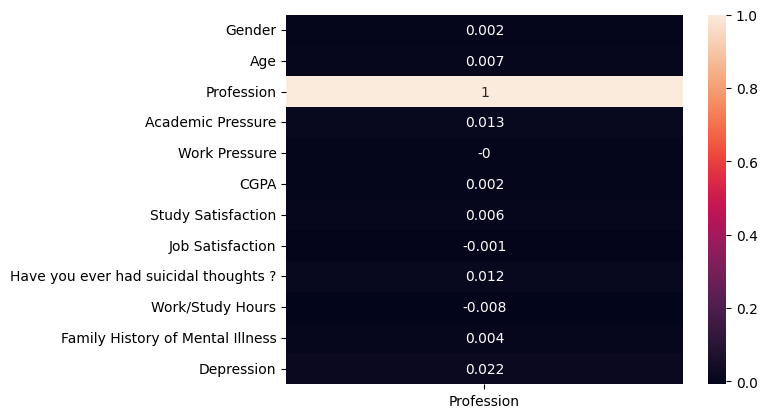

In [25]:
df_corr = df_preprocessed.select_dtypes('number').corr()['Profession'].to_frame()
sns.heatmap(df_corr.round(3), annot=True)

### Sleep duration

We can encode *Sleep Duration* into an ordinal way

In [26]:
sleep_cat = df_preprocessed['Sleep Duration'].unique()
sleep_cat

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [27]:
df_preprocessed['Sleep Duration'].value_counts()

,count
Sleep Duration,
'Less than 5 hours',8310
'7-8 hours',7346
'5-6 hours',6183
'More than 8 hours',6044
Others,18


Once only are 18 'Others' values, we are going to delete it

In [28]:
df_preprocessed = df_preprocessed[df_preprocessed['Sleep Duration'] != 'Others']
df_preprocessed['Sleep Duration'].value_counts()

,count
Sleep Duration,
'Less than 5 hours',8310
'7-8 hours',7346
'5-6 hours',6183
'More than 8 hours',6044


In [29]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories=[["'Less than 5 hours'",
                                "'5-6 hours'",
                                "'7-8 hours'",
                                "'More than 8 hours'"]])

df_preprocessed.loc[:, 'Sleep Duration'] = enc.fit_transform(df_preprocessed['Sleep Duration'].to_frame()).astype('int')
df_preprocessed['Sleep Duration'].head()

,Sleep Duration
0,1
1,1
2,0
3,2
4,1


### Dietary Habits

Similarly as Sleep Duration, let's do it with dietary habits

In [30]:
dietary_cat = df_preprocessed['Dietary Habits'].unique()
dietary_cat

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [31]:
df_preprocessed['Dietary Habits'].value_counts()

,count
Dietary Habits,
Unhealthy,10309
Moderate,9914
Healthy,7648
Others,12


In [32]:
df_preprocessed = df_preprocessed[df_preprocessed['Dietary Habits'] != 'Others']
df_preprocessed['Dietary Habits'].value_counts()

,count
Dietary Habits,
Unhealthy,10309
Moderate,9914
Healthy,7648


In [33]:
enc = OrdinalEncoder(categories=[['Unhealthy','Moderate','Healthy' ]])

df_preprocessed.loc[:, 'Dietary Habits'] = enc.fit_transform(df_preprocessed['Dietary Habits'].to_frame())
df_preprocessed['Dietary Habits'].head()

,Dietary Habits
0,2.0
1,1.0
2,2.0
3,1.0
4,1.0


In [34]:
{value: ind for ind, value in enumerate(enc.categories_[0])}

{'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2}

### Financial Stress

In [35]:
df_preprocessed['Financial Stress'].unique()

array(['1.0', '2.0', '5.0', '3.0', '4.0', '?'], dtype=object)

In [36]:
df_preprocessed = df_preprocessed[df_preprocessed['Financial Stress'] != '?']
df_preprocessed['Financial Stress'].unique()

array(['1.0', '2.0', '5.0', '3.0', '4.0'], dtype=object)

## New EDA

In [37]:
df_preprocessed.shape

(27868, 15)

In [38]:
df_preprocessed.head()

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,0,5.0,0.0,8.97,2.0,0.0,1,2.0,1,3.0,1.0,0,1
1,0,24.0,0,2.0,0.0,5.90,5.0,0.0,1,1.0,0,3.0,2.0,1,0
2,1,31.0,0,3.0,0.0,7.03,5.0,0.0,0,2.0,0,9.0,1.0,1,0
3,0,28.0,0,3.0,0.0,5.59,2.0,0.0,2,1.0,1,4.0,5.0,1,1
4,0,25.0,0,4.0,0.0,8.13,3.0,0.0,1,1.0,1,1.0,1.0,0,0


In [39]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27868 entries, 0 to 27900
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27868 non-null  int64  
 1   Age                                    27868 non-null  float64
 2   Profession                             27868 non-null  int64  
 3   Academic Pressure                      27868 non-null  float64
 4   Work Pressure                          27868 non-null  float64
 5   CGPA                                   27868 non-null  float64
 6   Study Satisfaction                     27868 non-null  float64
 7   Job Satisfaction                       27868 non-null  float64
 8   Sleep Duration                         27868 non-null  object 
 9   Dietary Habits                         27868 non-null  object 
 10  Have you ever had suicidal thoughts ?  27868 non-null  int64  
 11  Work/St

In [40]:

# Convert object columns to float in df_preprocessed
for column in df_preprocessed.columns:
  if df_preprocessed[column].dtype == 'object':
      df_preprocessed[column] = pd.to_numeric(df_preprocessed[column], errors='coerce')

# Print the updated data types
df_preprocessed.dtypes


,0
Gender,int64
Age,float64
Profession,int64
Academic Pressure,float64
Work Pressure,float64
CGPA,float64
Study Satisfaction,float64
Job Satisfaction,float64
Sleep Duration,int64
Dietary Habits,float64


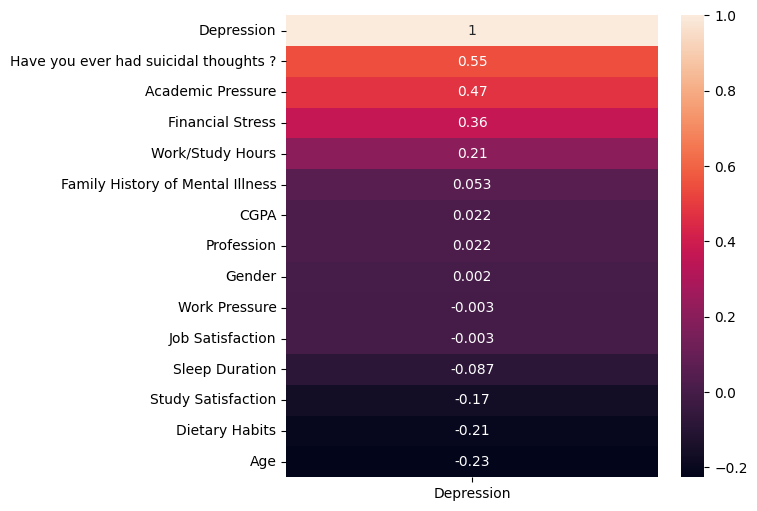

In [41]:
# Create a figure and axes with the desired figsize
fig, ax = plt.subplots(figsize=(6, 6))
# Pass the axes to sns.heatmap
df_corr = df_preprocessed.corr()['Depression'].to_frame().sort_values(by=['Depression'], ascending=False)
sns.heatmap(df_corr.round(3), annot=True, ax=ax) # Pass 'ax' to heatmap
plt.show()

### Select columns to train models

Where correlation is greater than |0.1|

In [42]:
df_clean = df_preprocessed.copy()

In [43]:
correlation_with_depression = df_clean.corr()['Depression'].abs()

# Drop columns where the absolute correlation with 'Depression' is less than 0.1
columns_to_drop = correlation_with_depression[correlation_with_depression < 0.1].index
df_clean = df_clean.drop(columns=columns_to_drop)
df_clean.head()

,Age,Academic Pressure,Study Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Depression
0,33.0,5.0,2.0,2.0,1,3.0,1.0,1
1,24.0,2.0,5.0,1.0,0,3.0,2.0,0
2,31.0,3.0,5.0,2.0,0,9.0,1.0,0
3,28.0,3.0,2.0,1.0,1,4.0,5.0,1
4,25.0,4.0,3.0,1.0,1,1.0,1.0,0


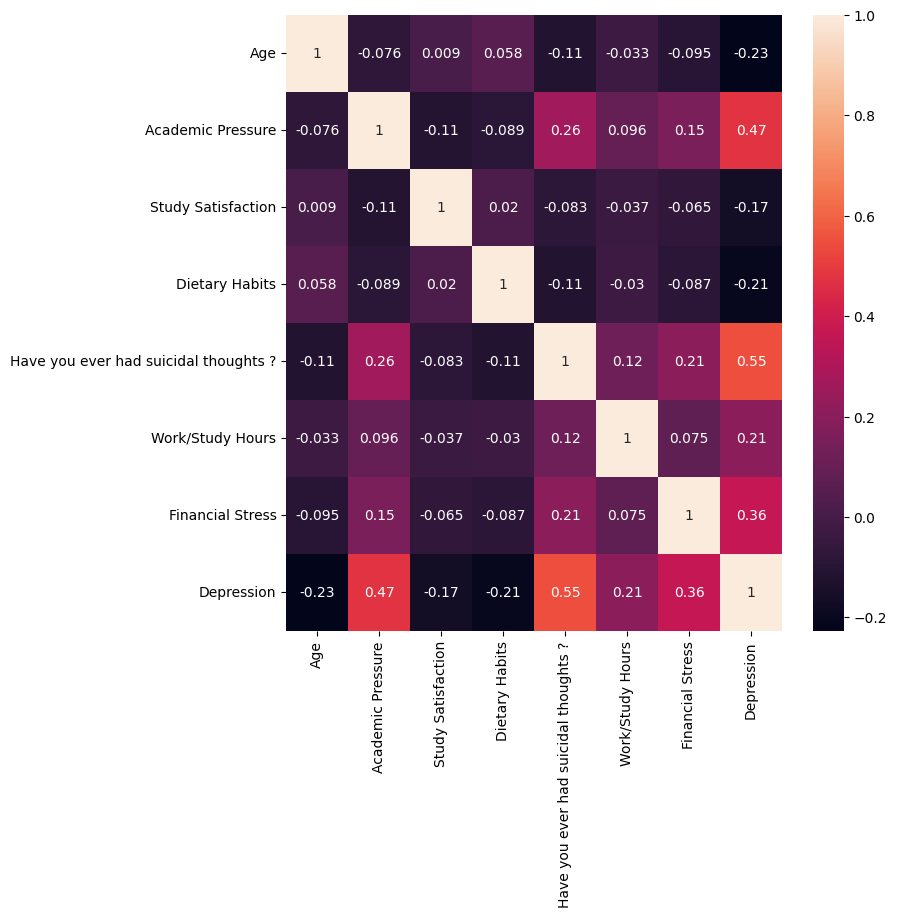

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))
# Pass the axes to sns.heatmap
df_corr = df_clean.corr()
sns.heatmap(df_corr.round(3), annot=True, ax=ax) # Pass 'ax' to heatmap
plt.show()

# MODEL TRAINING AND SELECTION

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
from tqdm import tqdm

In [46]:
df_train_test = df_clean.copy()
X = df_train_test.drop(['Depression'], axis=1)
y = df_train_test['Depression']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [47]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [48]:
models = {
    "Logistic Regression": LogisticRegression(
        C=1.0,
        solver="liblinear",
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=500,
        max_depth=9,
        min_samples_split=5,
        class_weight="balanced_subsample",
        random_state=42
    ),

    "Decision Tree": DecisionTreeClassifier(
        max_depth=8,
        min_samples_split=10,
        criterion="gini",
        class_weight="balanced",
        random_state=42
    ),

    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.03,
        max_depth=7,
        scale_pos_weight=0.75,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=42
    ),

    "LightGBM": LGBMClassifier(
        n_estimators=400,
        learning_rate=0.03,
        max_depth=6,
        num_leaves=60,
        min_data_in_leaf=5,
        force_col_wise=True,
        scale_pos_weight=0.75,
        verbose=-1,
        random_state=42
    ),

    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=500,
        learning_rate=0.03,
        max_depth=5,
        min_samples_split=5,
        random_state=42
    ),

    "SGD Classifier": SGDClassifier(
        loss="log_loss",
        penalty="elasticnet",
        alpha=0.0001,
        max_iter=3000,
        tol=1e-4,
        class_weight="balanced",
        random_state=42
    )
}

Training Models:   0%|          | 0/7 [00:00<?, ?it/s]

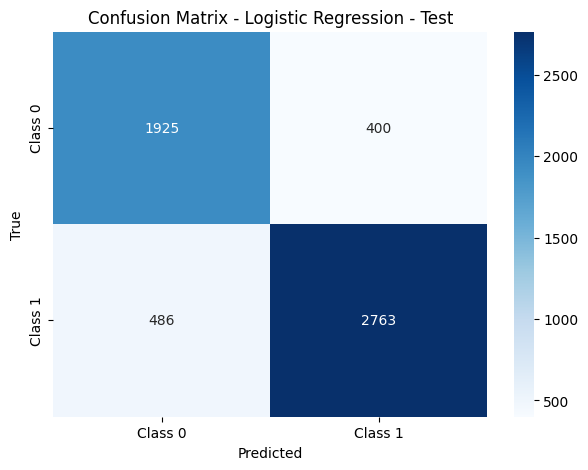

Training Models:  14%|█▍        | 1/7 [00:01<00:07,  1.30s/it]

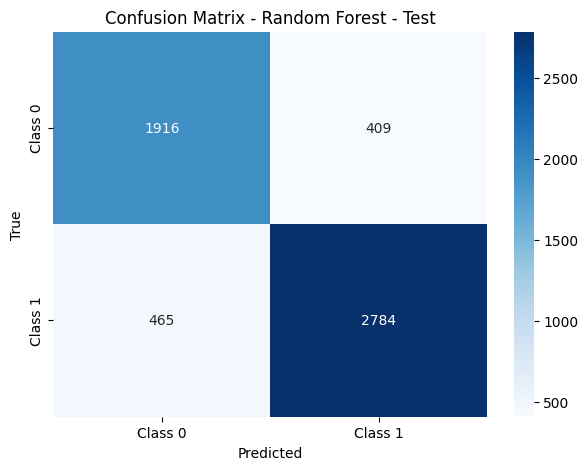

Training Models:  29%|██▊       | 2/7 [00:11<00:31,  6.31s/it]

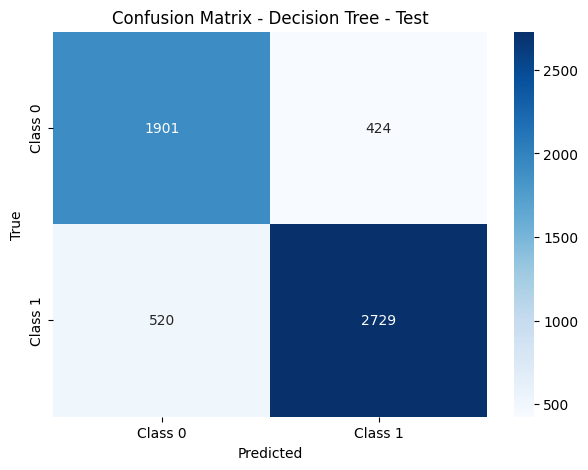

Training Models:  43%|████▎     | 3/7 [00:11<00:14,  3.53s/it]/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:33:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


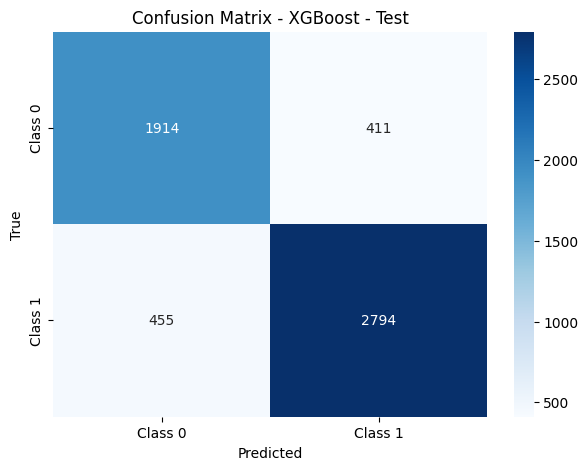

Training Models:  57%|█████▋    | 4/7 [00:12<00:08,  2.74s/it]

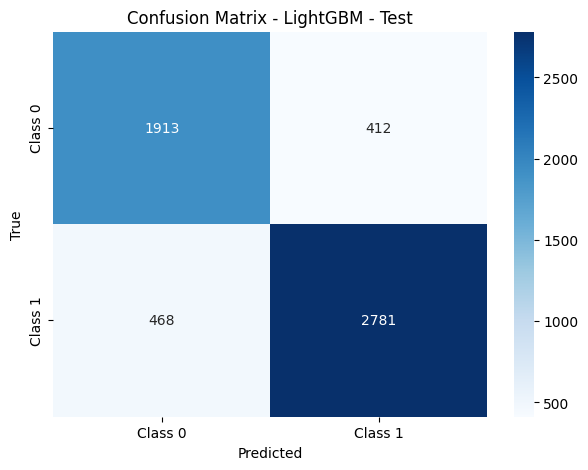

Training Models:  71%|███████▏  | 5/7 [00:16<00:05,  2.93s/it]

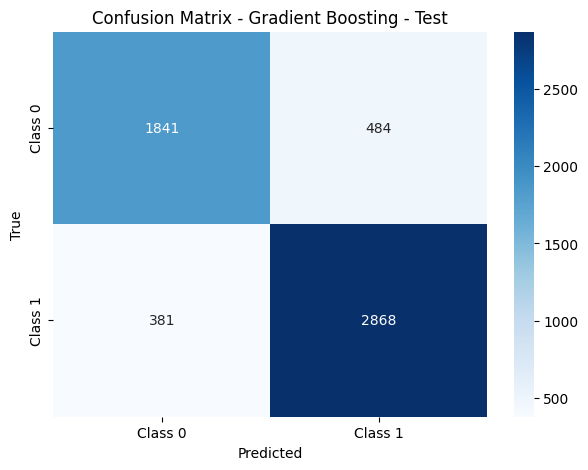

Training Models:  86%|████████▌ | 6/7 [00:32<00:07,  7.61s/it]

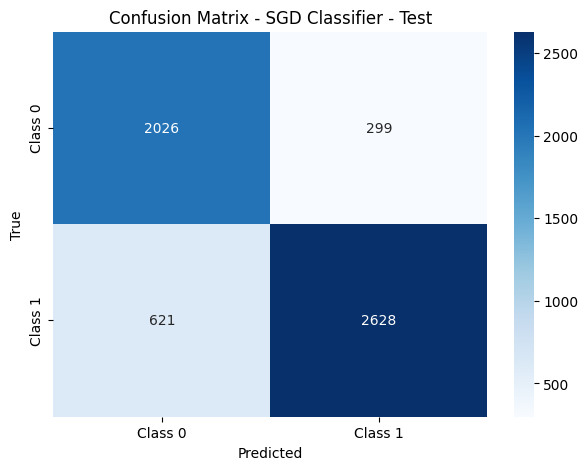

Training Models: 100%|██████████| 7/7 [00:35<00:00,  5.09s/it]


                 Model  Train Accuracy  Train F1 Score  Train ROC AUC  \
3              XGBoost        0.869202        0.869427       0.867028   
5    Gradient Boosting        0.860097        0.859570       0.852438   
1        Random Forest        0.861263        0.861556       0.859300   
4             LightGBM        0.866511        0.866764       0.864462   
0  Logistic Regression        0.842020        0.842481       0.840464   
6       SGD Classifier        0.831120        0.832317       0.837592   
2        Decision Tree        0.847044        0.847633       0.846917   

   Test Accuracy  Test F1 Score  Test ROC AUC  
3       0.844636       0.844834      0.841591  
5       0.844815       0.844268      0.837281  
1       0.843201       0.843452      0.840483  
4       0.842124       0.842377      0.839376  
0       0.841048       0.841425      0.839186  
6       0.834948       0.835990      0.840131  
2       0.830642       0.831085      0.828793  


In [49]:
results = []
for name, model in tqdm(models.items(), desc="Training Models", total=len(models)):
    model.fit(X_train, y_train)

    # Evaluación en Train
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    train_roc_auc = roc_auc_score(y_train, y_train_pred)

    # Evaluación en Test
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")
    test_roc_auc = roc_auc_score(y_test, y_test_pred)

    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Train F1 Score": train_f1,
        "Train ROC AUC": train_roc_auc,
        "Test Accuracy": test_accuracy,
        "Test F1 Score": test_f1,
        "Test ROC AUC": test_roc_auc,
    })

    # Matriz de confusión
    plot_confusion_matrix(y_test, y_test_pred, f"{name} - Test")

# Convertir resultados a DataFrame y ordenarlos por F1 Score en Test
results_df = pd.DataFrame(results).sort_values(by="Test F1 Score", ascending=False)
print(f'\n{results_df}')


### Model Selection: Gradient Boosting for Depression Detection

We decided to use **Gradient Boosting** as our final model due to its **low false negative rate** compared to other models. Given the **context of the problem—detecting student depression—** minimizing false negatives is crucial, as missing a case of depression could have serious consequences.

Although **XGBoost** had a slightly higher **F1 score and accuracy**, **Gradient Boosting performed similarly while offering better control over overfitting** and better interpretability. This makes it a **more reliable choice for a sensitive application like mental health prediction.**


## Exporting Gradient Boosting

In [ ]:
import joblib

joblib.dump(models['Gradient Boosting'], "gb_depression.pkl")

In [ ]:
model: GradientBoostingClassifier = joblib.load("gb_depression.pkl")

In [ ]:
model.predict(X_test)

In [ ]:
X_test.iloc[0,:]

In [ ]:
X_test.iloc[0,:].index